In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2 as cv

file_name = "09"
img = cv.imread("imgs/"+file_name+".jpg")
random.seed(11)

In [118]:
# 피부 검출1
lower = np.array([0, 48, 80], dtype = "uint8")
upper = np.array([20, 255, 255], dtype = "uint8")

converted = cv.cvtColor(img, cv.COLOR_BGR2HSV)
skinMask = cv.inRange(converted, lower, upper)

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (11,11))
skinMask = cv.erode(skinMask, kernel, iterations = 2)
skinMask = cv.dilate(skinMask, kernel, iterations = 2)

skinMask = cv.GaussianBlur(skinMask, (3,3), 0)
skin = cv.bitwise_and(img, img, mask = skinMask)

result = skin

In [119]:
# 피부 검출2
img = cv.cvtColor(result, cv.COLOR_BGR2HLS)
skin_img = img
temp_img = cv.cvtColor(img, cv.COLOR_HLS2RGB)

h, w, c = img.shape


for i in range(h) :
    for j in range(w) :
        H = img[i][j][0]
        L = img[i][j][1]
        S = img[i][j][2]
        
        R = temp_img[i][j][0]
        G = temp_img[i][j][1]
        B = temp_img[i][j][2]
        
        LS_ratio = L/S
        skin_pixel = bool((S>=50) and (LS_ratio > 0.5) and (LS_ratio < 3.0) and ((H <= 25) or (H >= 165)))
        temp_pixel = bool((R == G) and (G == B) and (R >= 220))
                
        if skin_pixel :
            if temp_pixel :
                skin_img[i][j][0] = 0
                skin_img[i][j][1] = 0
                skin_img[i][j][2] = 0
            else :
                pass
        else :
            skin_img[i][j][0] = 0
            skin_img[i][j][1] = 0
            skin_img[i][j][2] = 0
        
        
        

skin_img = cv.cvtColor(skin_img, cv.COLOR_HLS2BGR)            
for i in range(h) :
    for j in range(w) :
        B = skin_img[i][j][0]
        G = skin_img[i][j][1]
        R = skin_img[i][j][2]

        bg_pixel = bool(B==0 and G==0 and R==0)
        
        if bg_pixel :
            skin_img[i][j][0] = 255
            skin_img[i][j][1] = 255
            skin_img[i][j][2] = 255
        else :
            pass

C:\Users\user\anaconda3\envs\GAN\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in ubyte_scalars


In [120]:
from sklearn.cluster import KMeans

cvt_img = cv.cvtColor(skin_img, cv.COLOR_BGR2RGB)

cvt_img = cvt_img.reshape((cvt_img.shape[0]*cvt_img.shape[1], 3))
k = 20
clt = KMeans(n_clusters=k)
clt.fit(cvt_img)

KMeans(n_clusters=20)

In [121]:
def color_ratio(clt) :
    numLabels = np.arange(0, len(np.unique(clt.labels_))+1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)
    hist = hist.astype("float")
    hist /= hist.sum()
    return hist

# k=5이므로 다섯개의 영역에 얼마만큼의 퍼센테이지가 차지되었는지 return된다.

def plot_colors(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):
        endX = startX + (percent * 300)
        cv.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX
    return bar

In [122]:
hist = color_ratio(clt)
temp = np.array(clt.cluster_centers_)

# hist에서 높은 값 제거, cluster_centers_에서도 제거)
del_index = hist.argmax()
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0)

# hist에서 제일 낮은 값 제거, cluster_centers_ 에서도 제거 
del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0) 

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0) # 3

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0) # 4

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0) # 5

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0)

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0)

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0)

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0)

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0)

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0)

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0)

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0)

del_index = np.argmin(hist)
hist = np.delete(hist, del_index)
temp = np.delete(temp, del_index, 0)

# 비율 재조정
hist = hist / hist.sum()

In [123]:
# 피부톤 RGB
colors=plot_colors(hist, temp)
colors_mean = colors.mean(axis=0)

# 피부톤 RGB 평균값 구하기
RGB_mean = colors_mean.mean(axis=0,dtype=int)
RGB_list = RGB_mean.tolist()

In [124]:
import colorsys

# RGB -> HSV
def revised_rgb_to_hsv(r, g, b):
    (h, s, v) = colorsys.rgb_to_hsv(r/255, g/255, b/255)
    h *= 360
    s *= 100
    v *= 100
    return round(h), round(s), round(v)

hsv = revised_rgb_to_hsv(RGB_list[0], RGB_list[1], RGB_list[2])

In [125]:
data = pd.read_excel('data2.xlsx', index_col='순번')

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x_data = data[['H', 'S', 'V']]
y_data = data['쿨웜']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=777)


scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression()

model.fit(x_train, y_train)


print(model.score(x_test, y_test))

0.7222222222222222


In [127]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


hsv = np.array(hsv)
min_hsv = np.array([0, 0, 0])
max_hsv = np.array([359, 100, 100])

sample = np.array([hsv, min_hsv, max_hsv])

#정규화
sample = scaler.transform(sample)

In [128]:
predict = model.predict(sample)
predict_proba = model.predict_proba(sample)
print(predict)
print(predict_proba)

[0 1 0]
[[7.81714510e-001 2.18285490e-001]
 [4.58080435e-001 5.41919565e-001]
 [1.00000000e+000 5.03674269e-259]]


In [129]:
if predict[0]==0:
    print("쿨톤일 확률이 {:.2f}% 입니다.".format(predict_proba[0][0]*100))
else:
    print("웜톤일 확률이 {:.2f}% 입니다.".format(predict_proba[0][1]*100))

쿨톤일 확률이 78.17% 입니다.


In [ ]:
# log씌워보기 

(array([1., 0., 0., 0., 1., 0., 0., 0., 0., 1.]),
 array([0.15      , 0.21076602, 0.27153203, 0.33229805, 0.39306407,
        0.45383008, 0.5145961 , 0.57536212, 0.63612813, 0.69689415,
        0.75766017]),
 <a list of 10 Patch objects>)

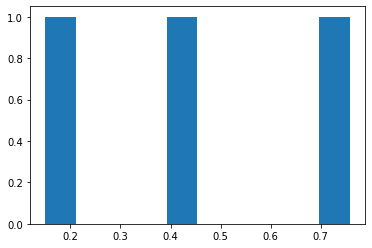

In [130]:
plt.hist(x_train[0])